In [4]:
import netCDF4     
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
plt.rcParams['figure.figsize'] = 15,8

#read grid paramenters
grid_Small=netCDF4.Dataset('/data/mala/GRIDCRO2D_01012015.nc')

#lon and lat to np array
lon=np.array(grid_Small.variables['LON'][0,0,:,:])
lat=np.array(grid_Small.variables['LAT'][0,0,:,:])

In [2]:
dic_coef={'BAP':1,'PM25':1,'PM10':1,'NO2':1.912,'NO':1.24,'O3':2,'SO2':2.66,'CO':1.160}
pollutants=['BAP','CO','NO','NO2','O3','PM','SO2']

# Write base year conc. in the dictionary dic_BASE
dic_BASE={}
for i in pollutants:
    if i == 'PM':
       dic_BASE['PM25']=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/LIFEIP_Small_PM_2015').variables['PM25']),axis=0)[0,:,:]*dic_coef['PM25']
       dic_BASE['PM10']=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/LIFEIP_Small_PM_2015').variables['PM10']),axis=0)[0,:,:]*dic_coef['PM10']
    else:
       dic_BASE[i]=np.average(np.array(netCDF4.Dataset('/media/sf_Share/TERKA/LIFEIP_Small_{0}_2015'.format(i)).variables[i]),axis=0)[0,:,:]*dic_coef[i] 

# Write business as usual conc. in the dictionary dic_BAU   
dic_BAU={}
for i in pollutants:
    if i == 'PM':
       dic_BAU['PM25']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_nevnor_PM').variables['PM25']),axis=0)[0,:,:]*dic_coef['PM25']
       dic_BAU['PM10']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_nevnor_PM').variables['PM10']),axis=0)[0,:,:]*dic_coef['PM10']
    else:
       dic_BAU[i]=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_nevnor_{0}'.format(i)).variables[i]),axis=0)[0,:,:]*dic_coef[i]  

# Write W1 scenario concentration in the dictionary dic_W1   
dic_W1={}
for i in pollutants:
    if i == 'PM':
       dic_W1['PM25']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_W1_PM').variables['PM25']),axis=0)[0,:,:]*dic_coef['PM25']
       dic_W1['PM10']=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_W1_PM').variables['PM10']),axis=0)[0,:,:]*dic_coef['PM10']
    else:
       dic_W1[i]=np.average(np.array(netCDF4.Dataset('/data/bussines_as_ussual/post_W1_{0}'.format(i)).variables[i]),axis=0)[0,:,:]*dic_coef[i]      
    

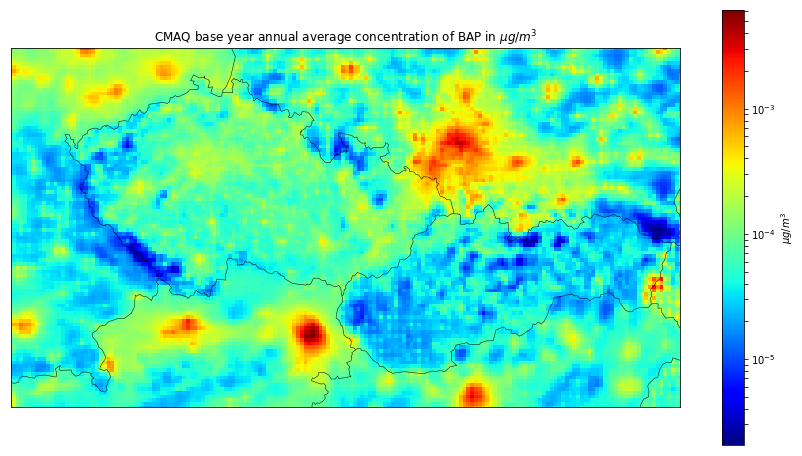

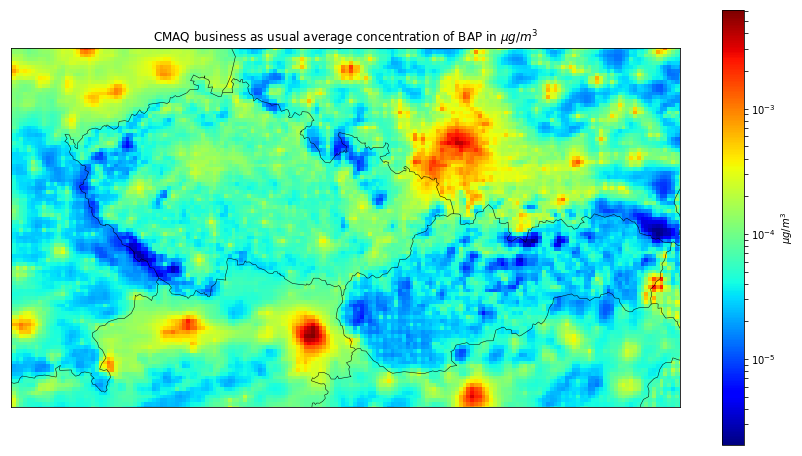

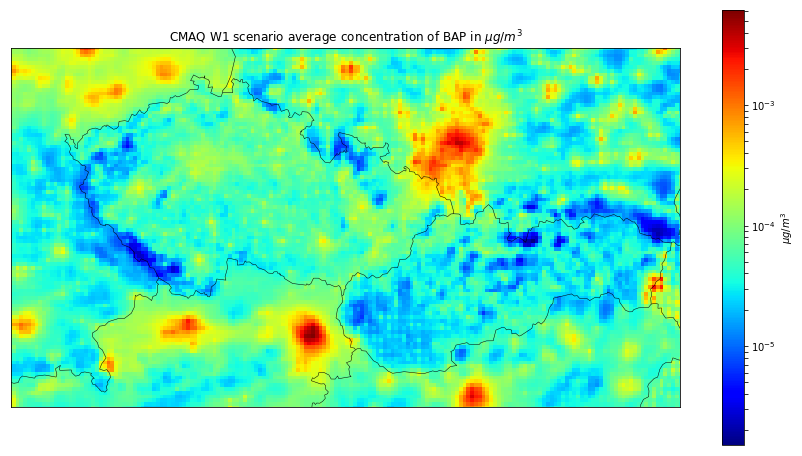

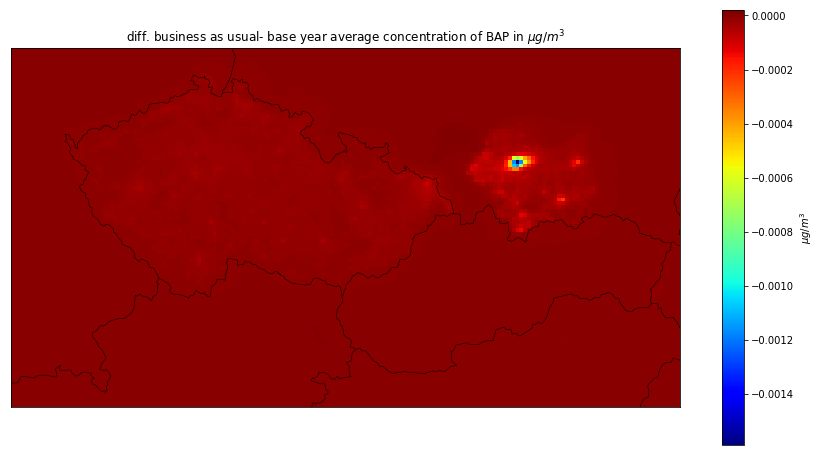

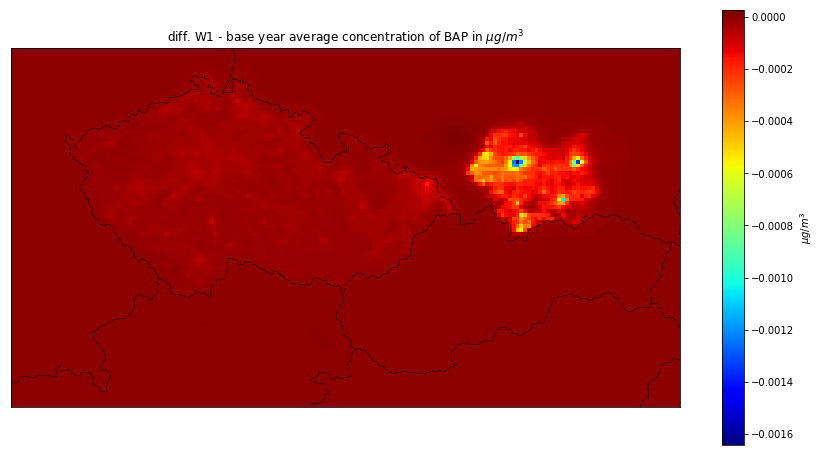

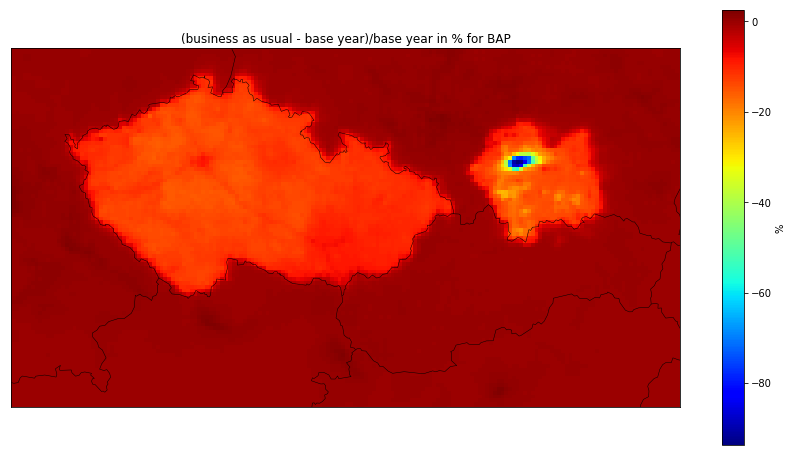

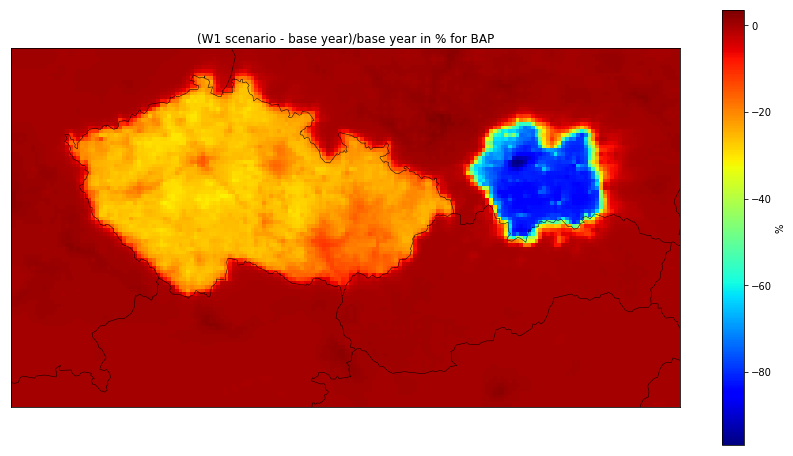

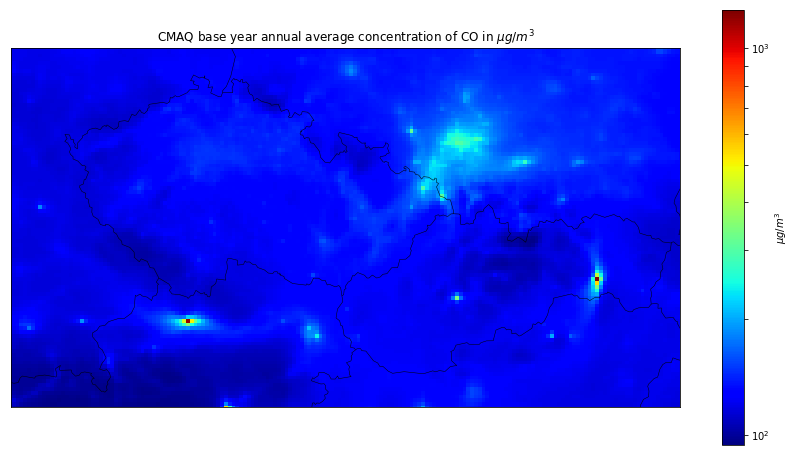

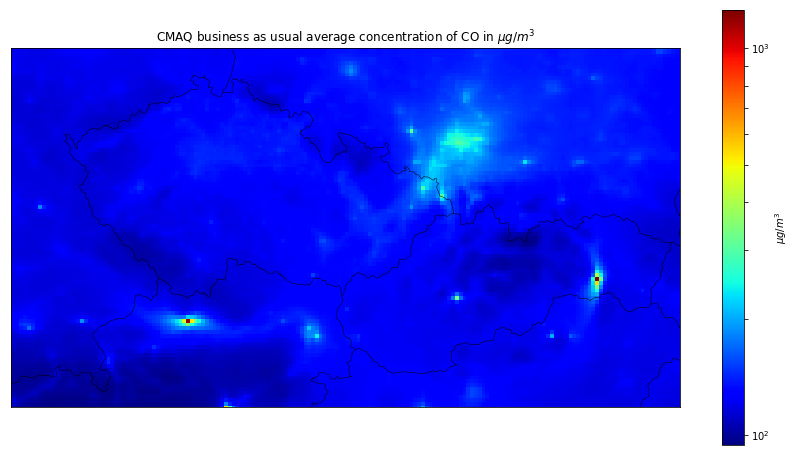

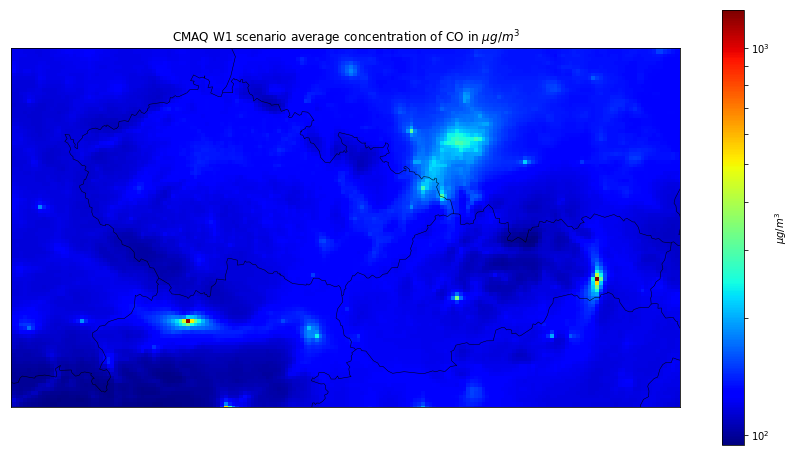

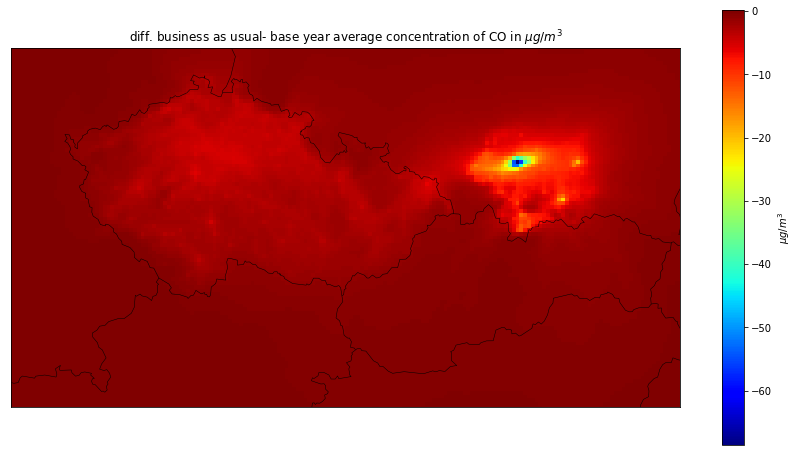

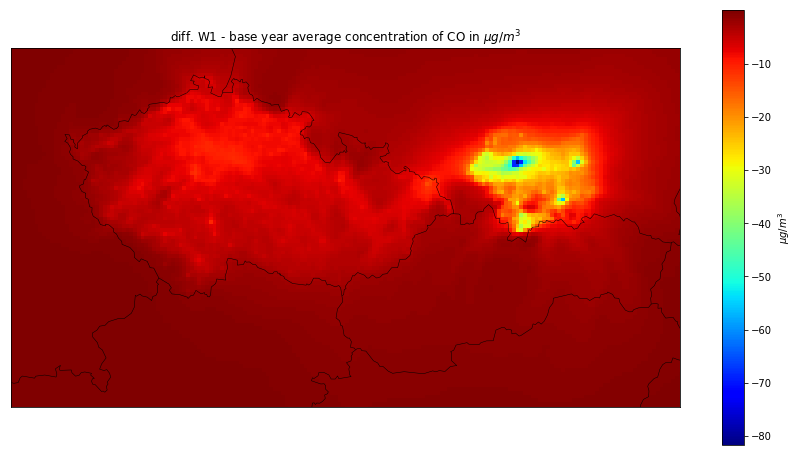

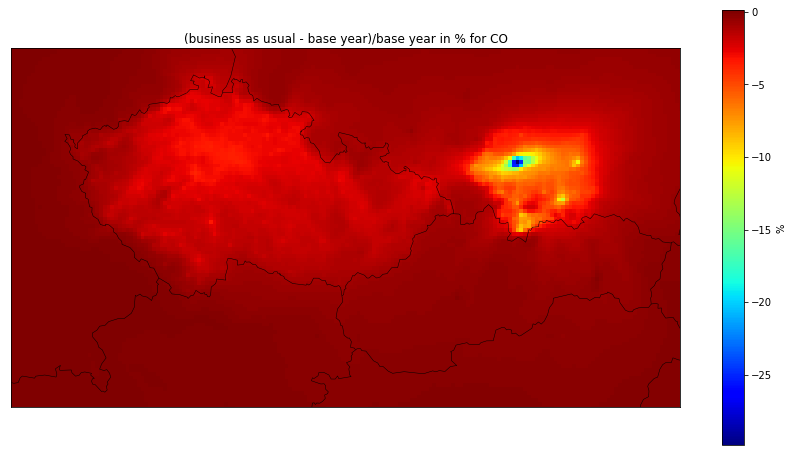

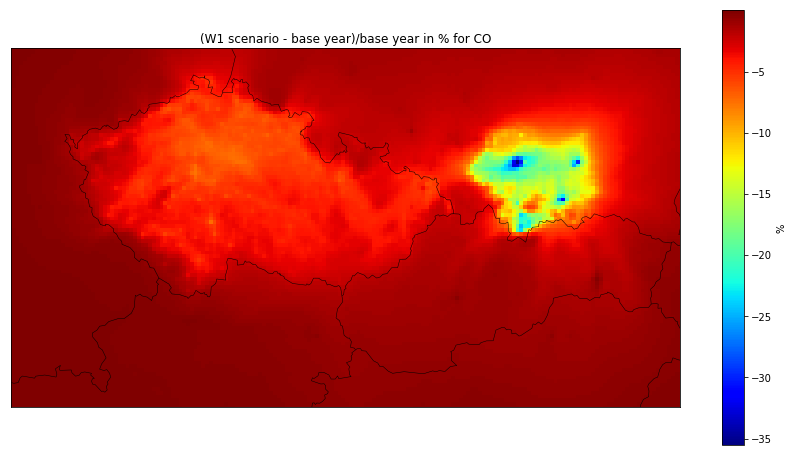

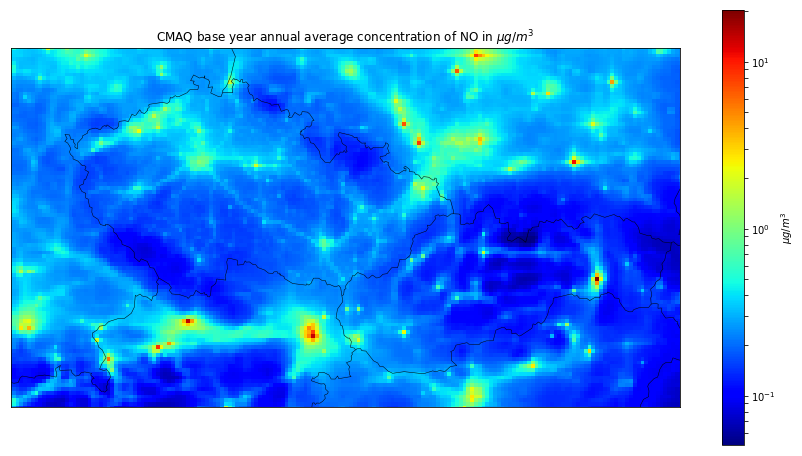

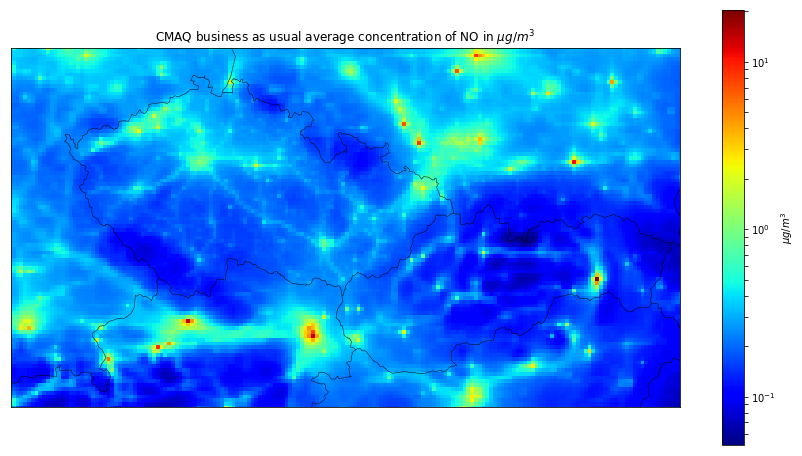

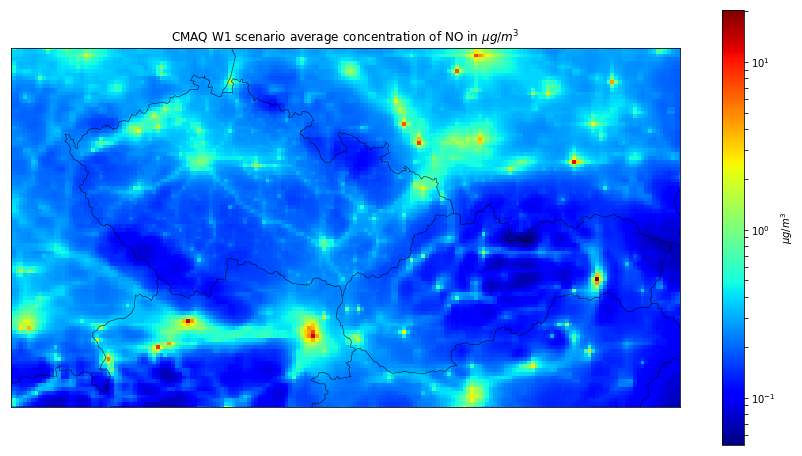

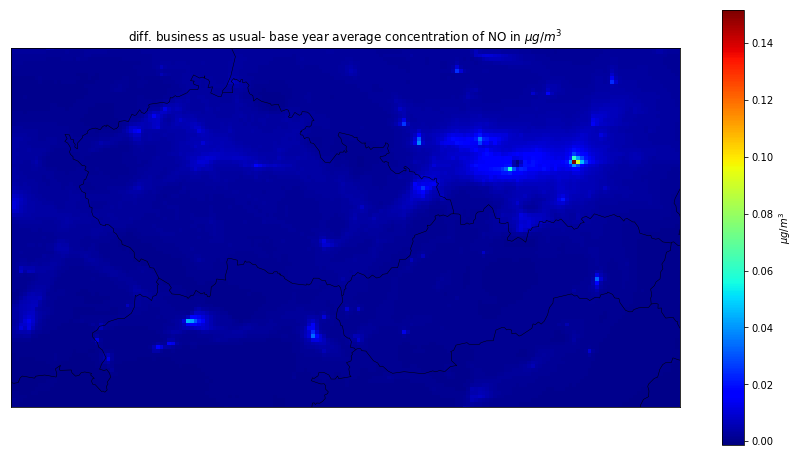

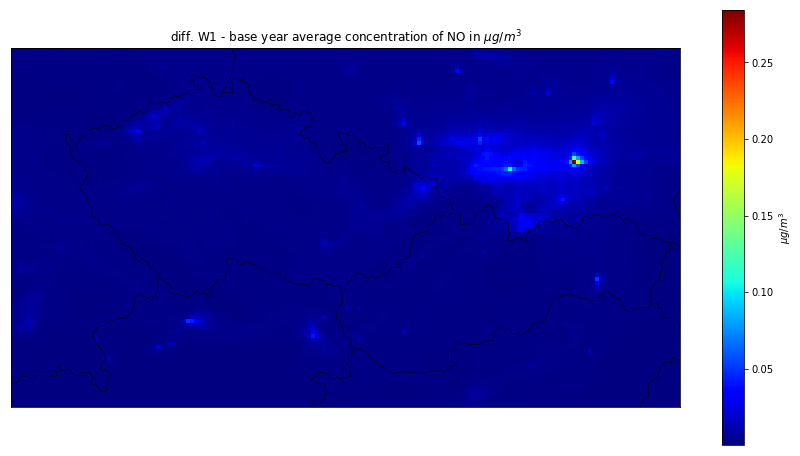

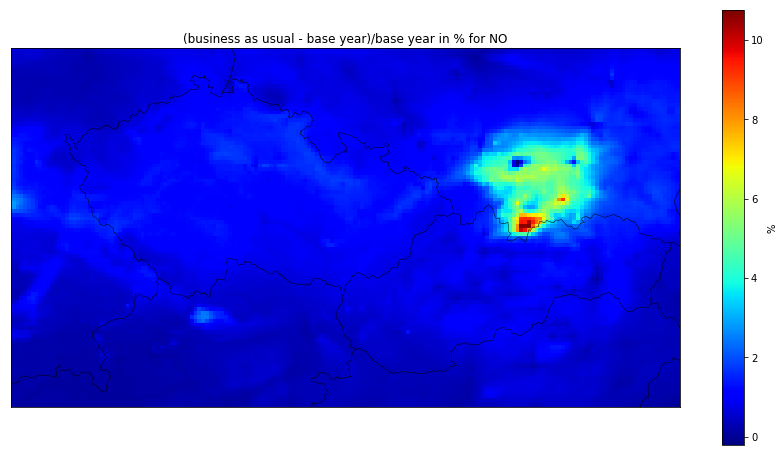

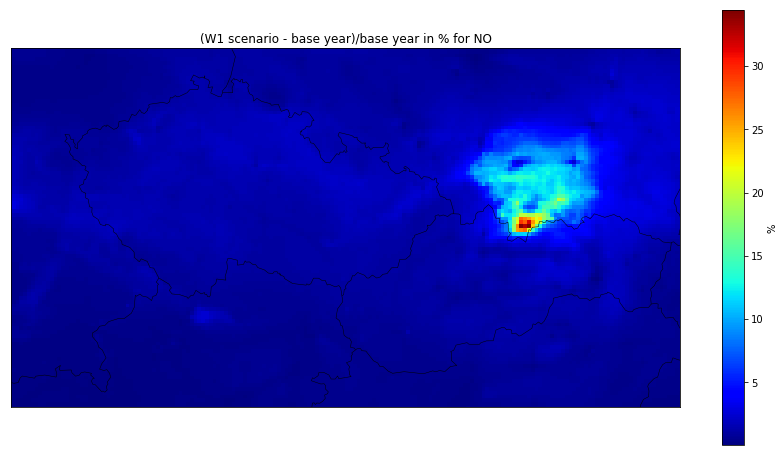

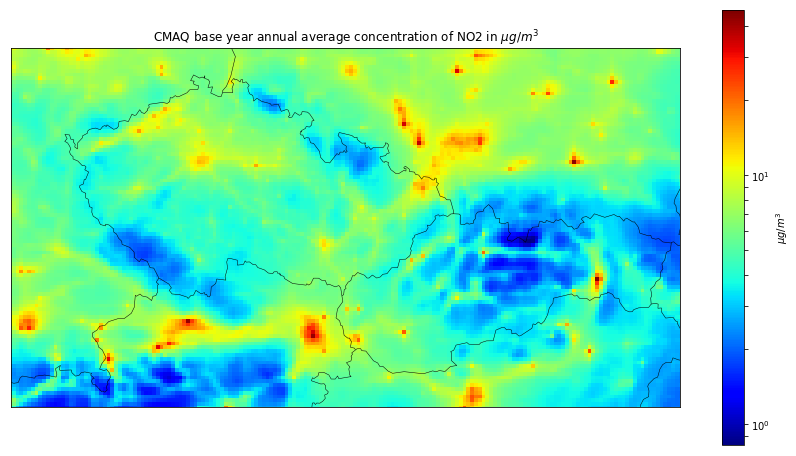

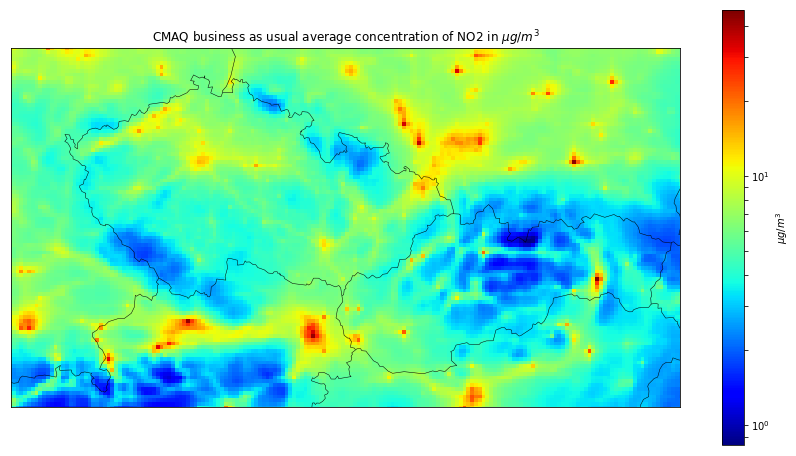

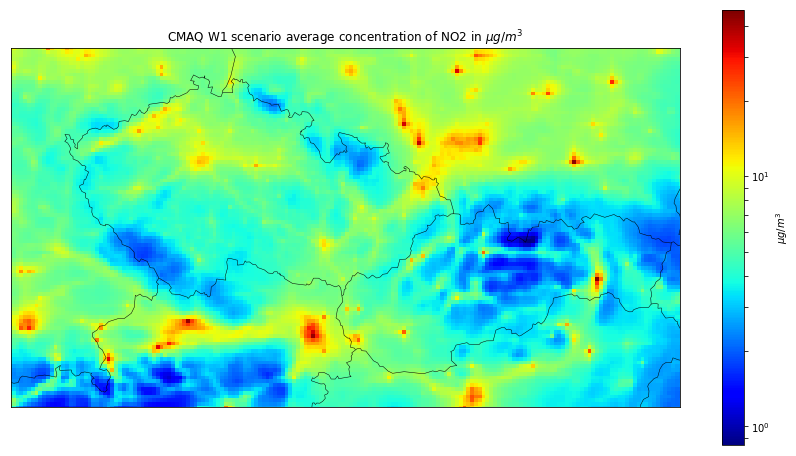

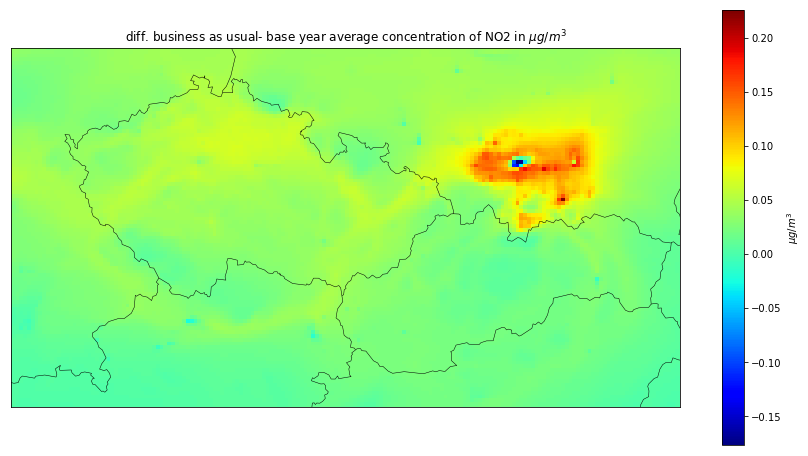

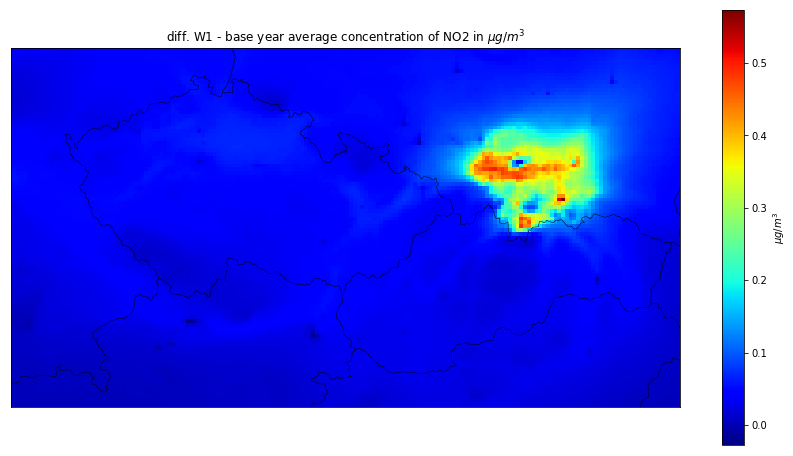

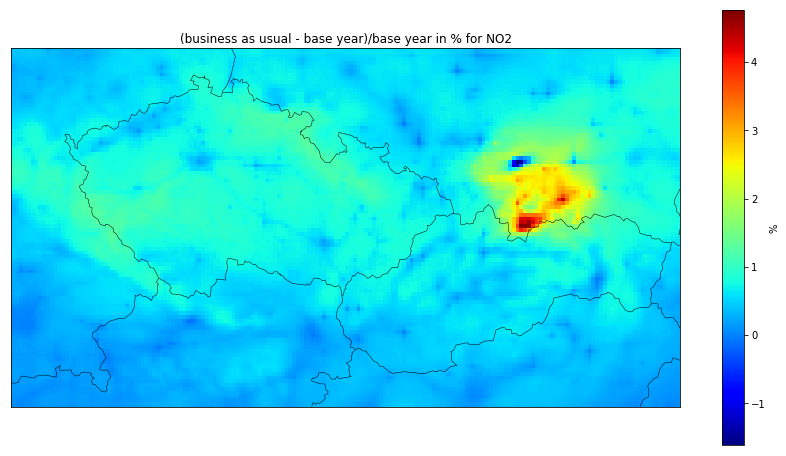

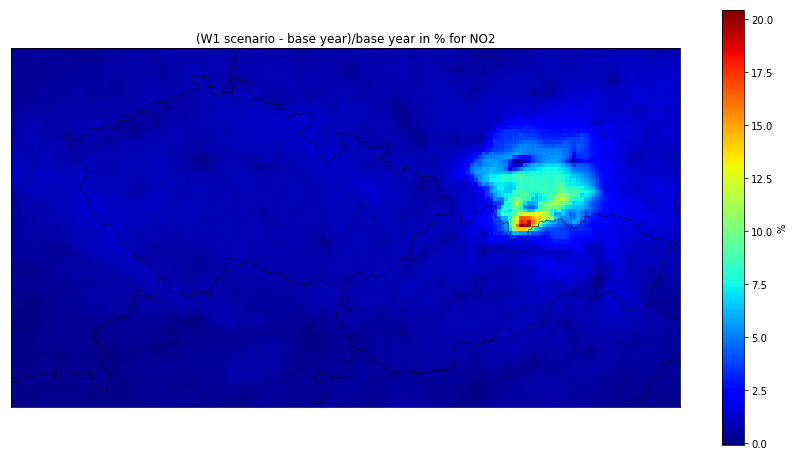

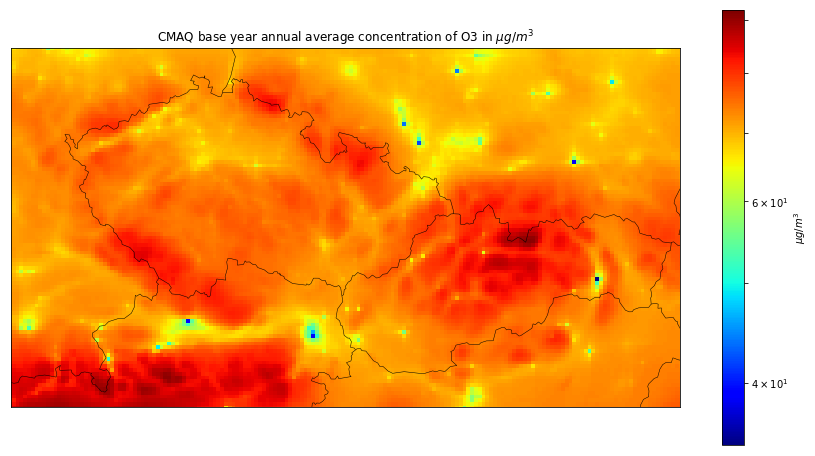

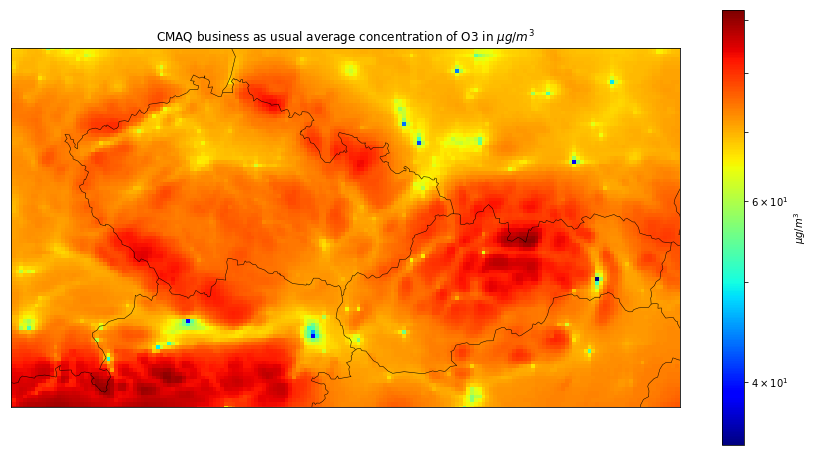

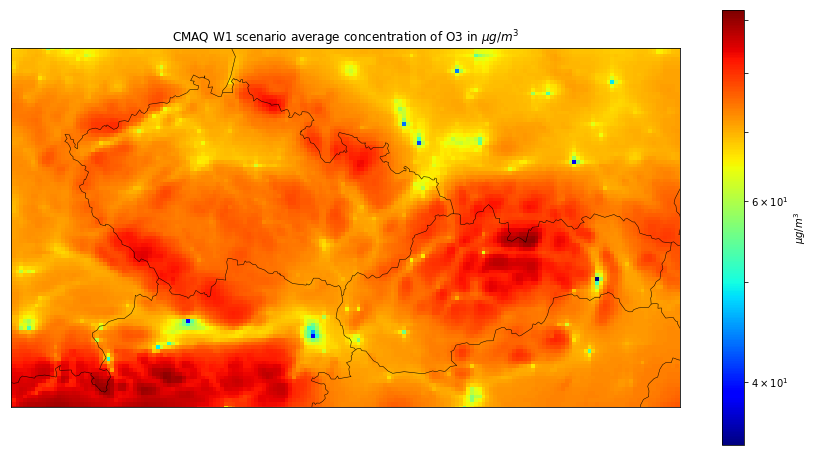

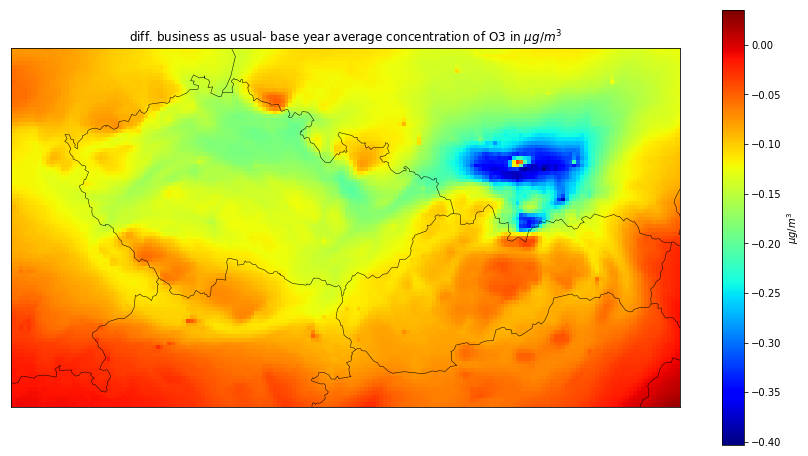

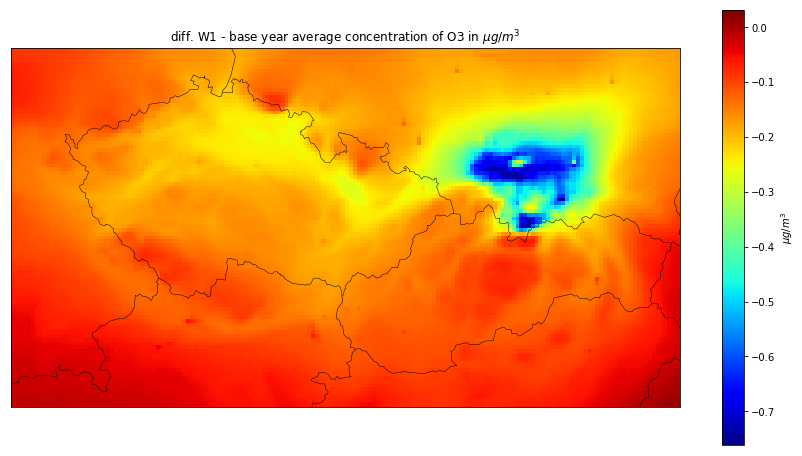

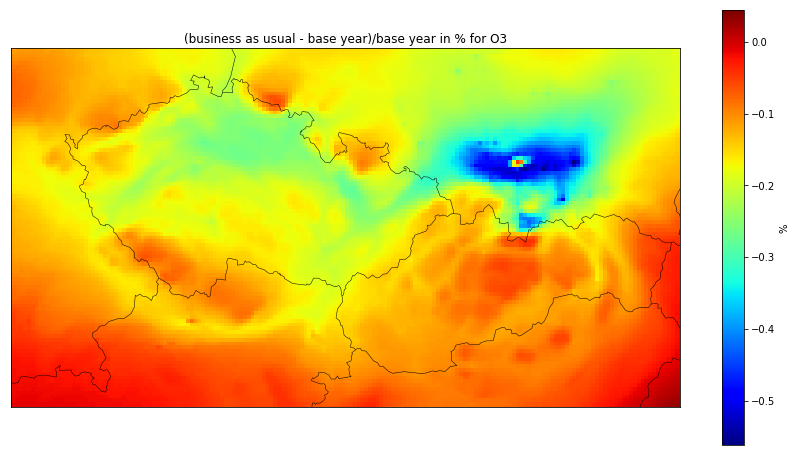

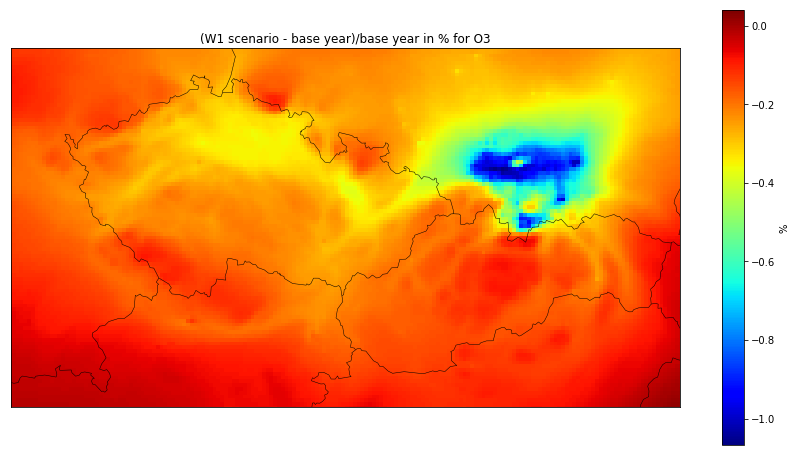

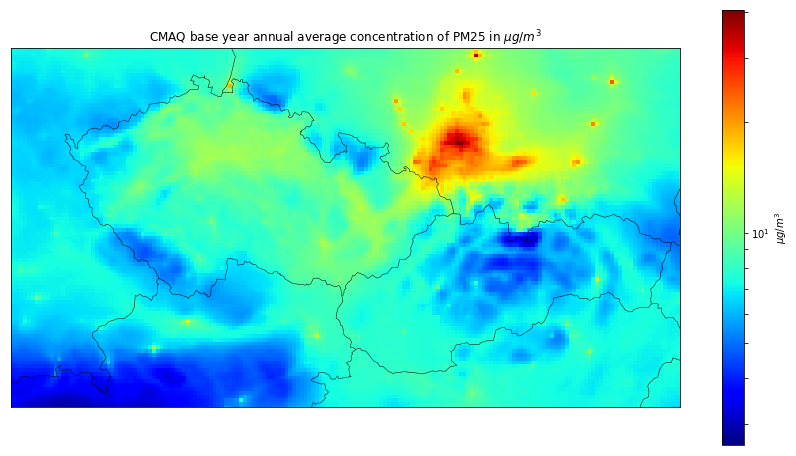

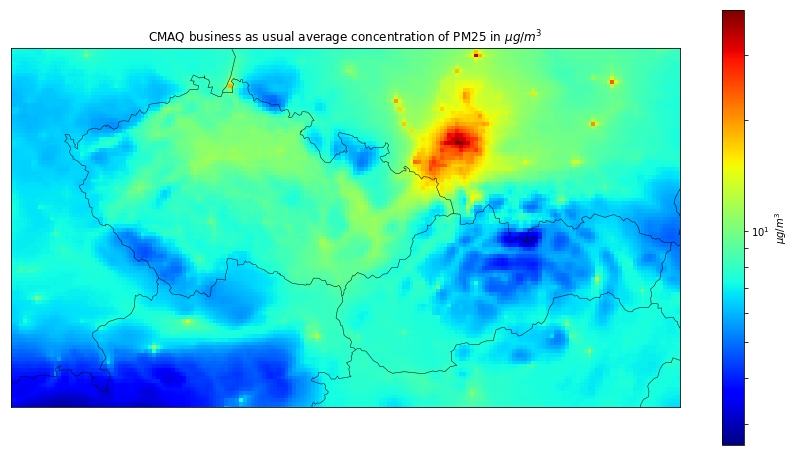

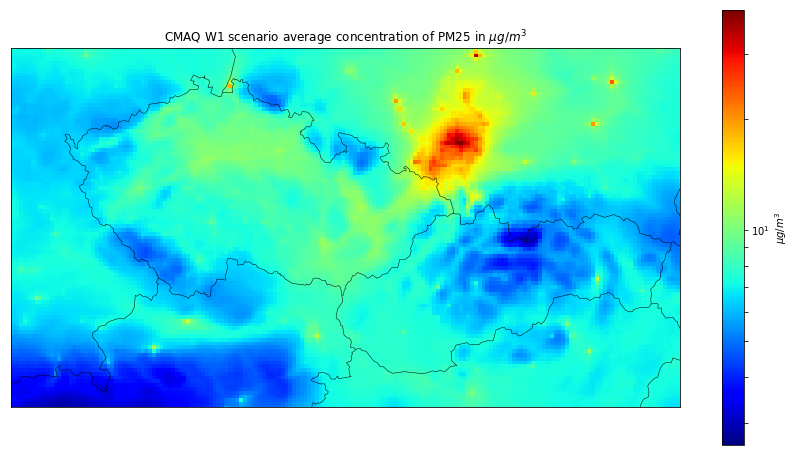

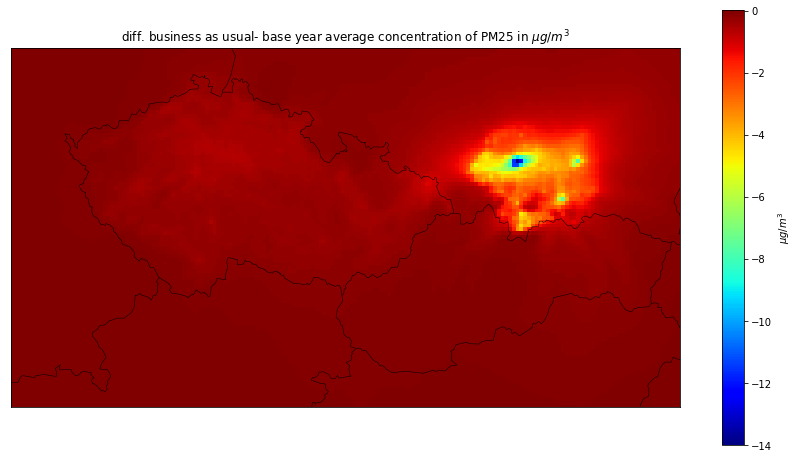

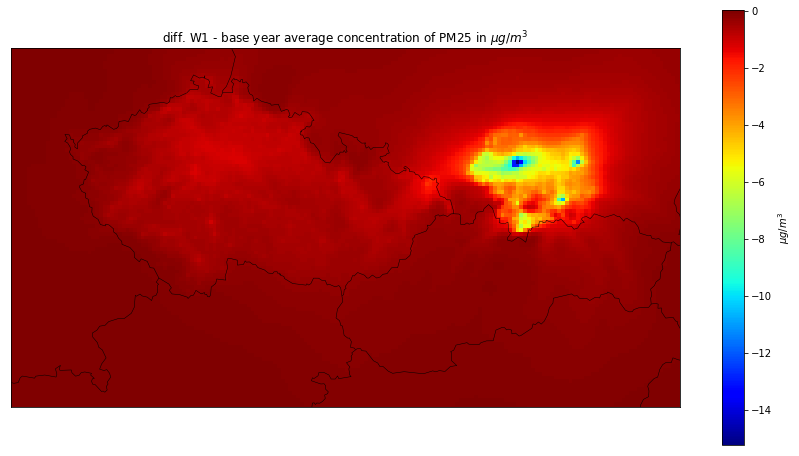

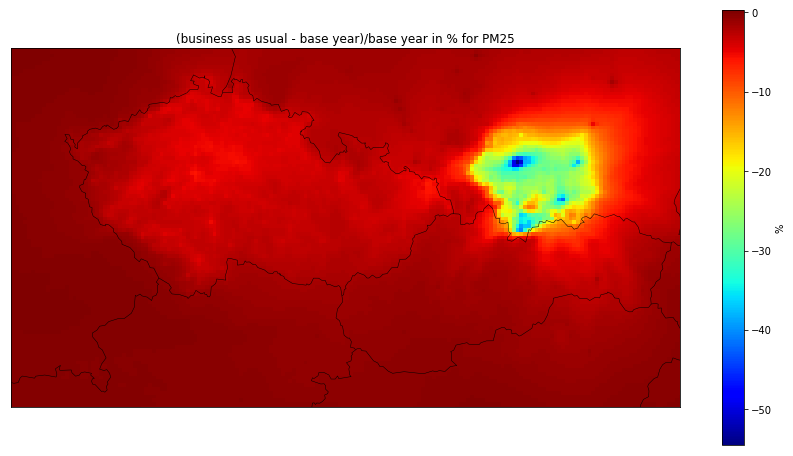

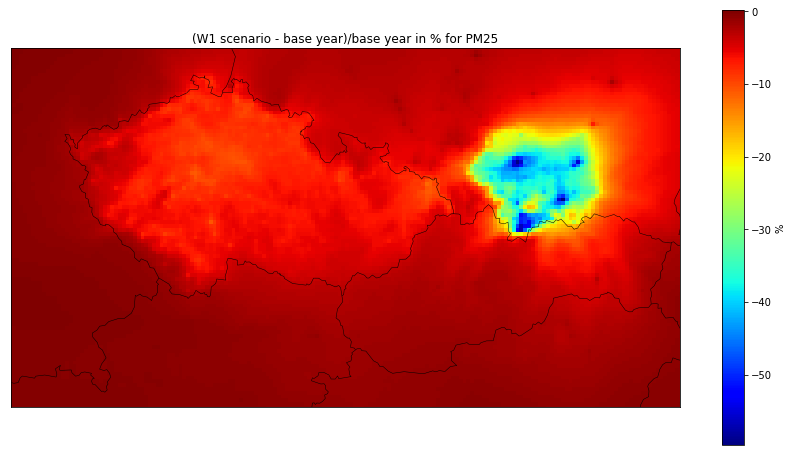

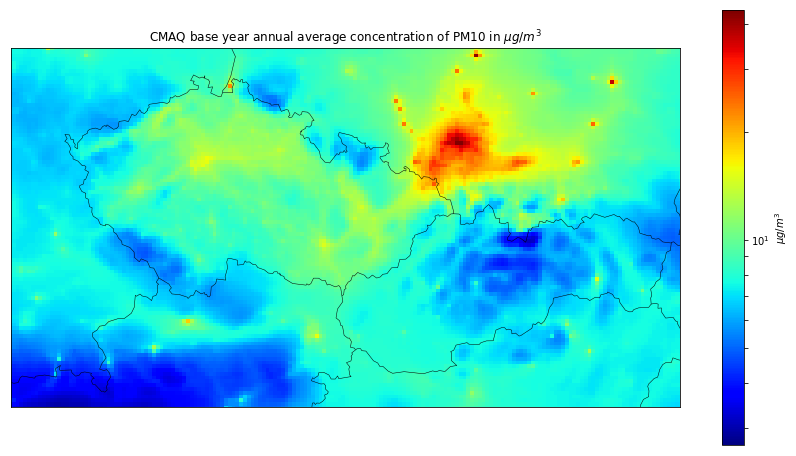

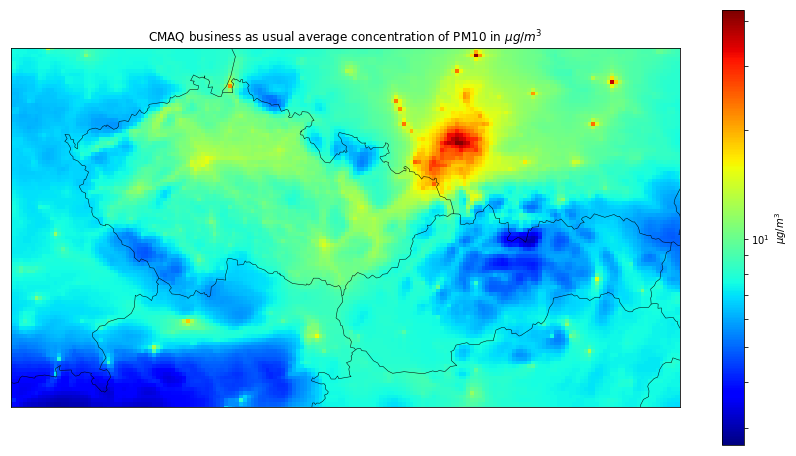

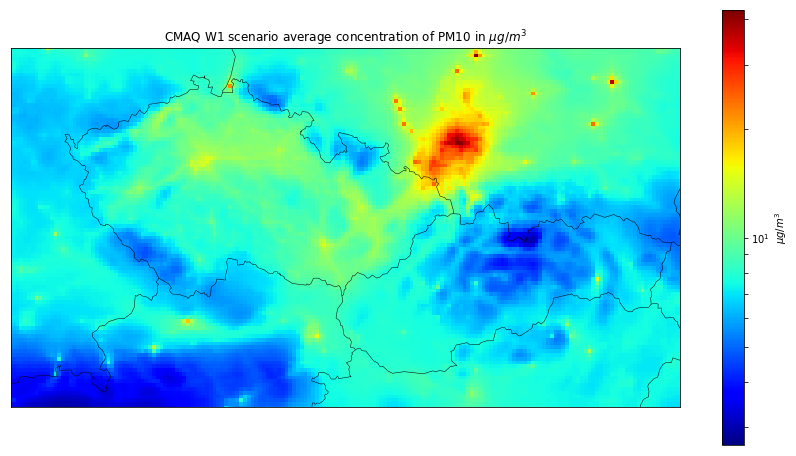

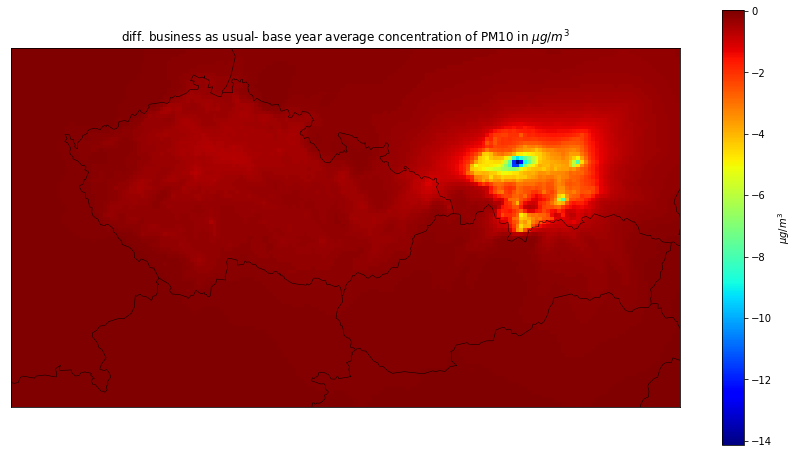

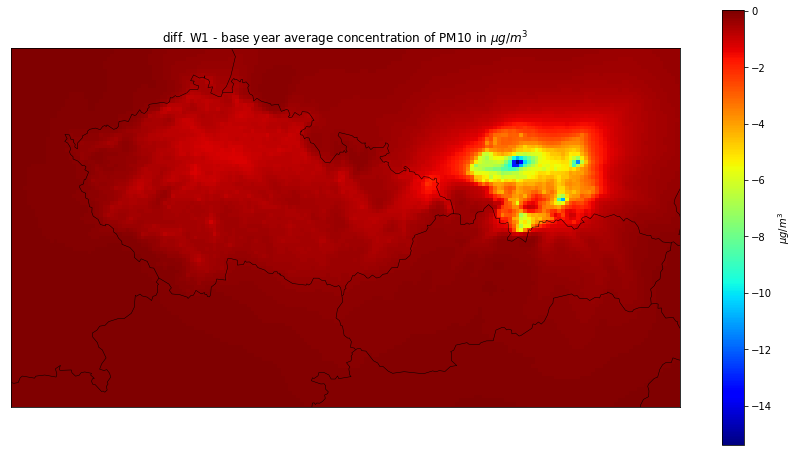

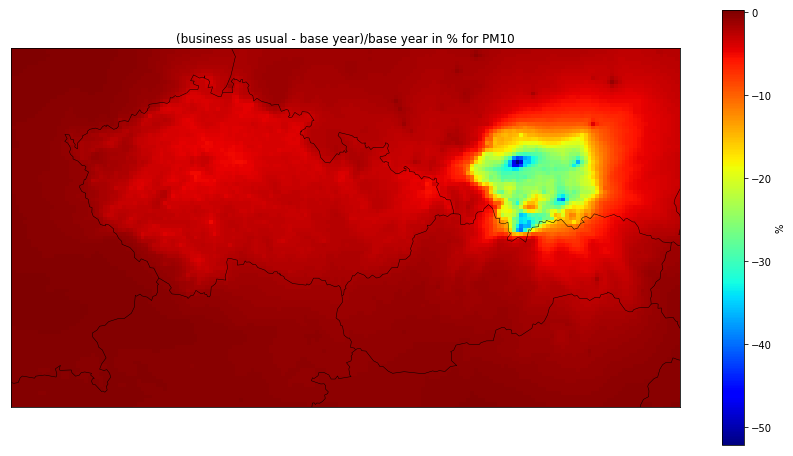

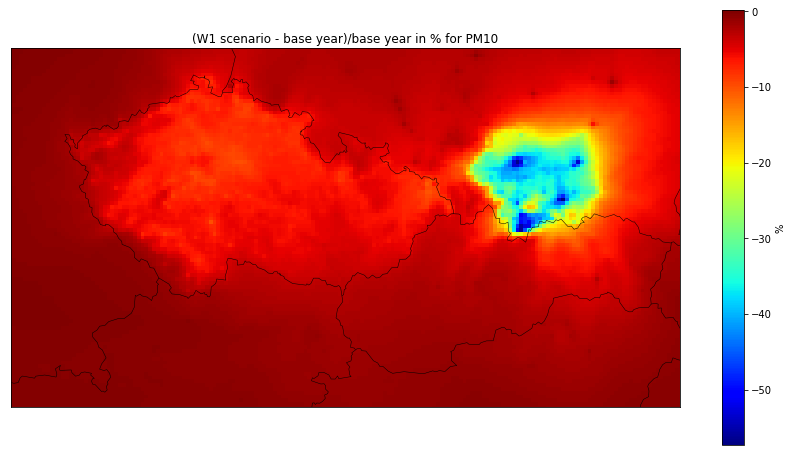

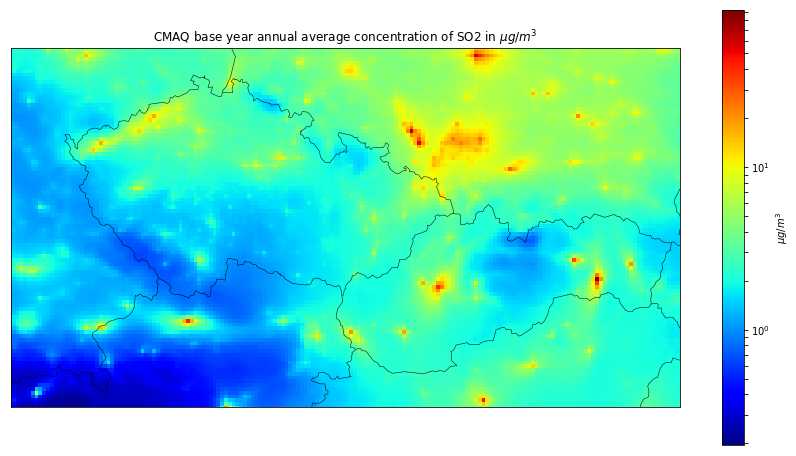

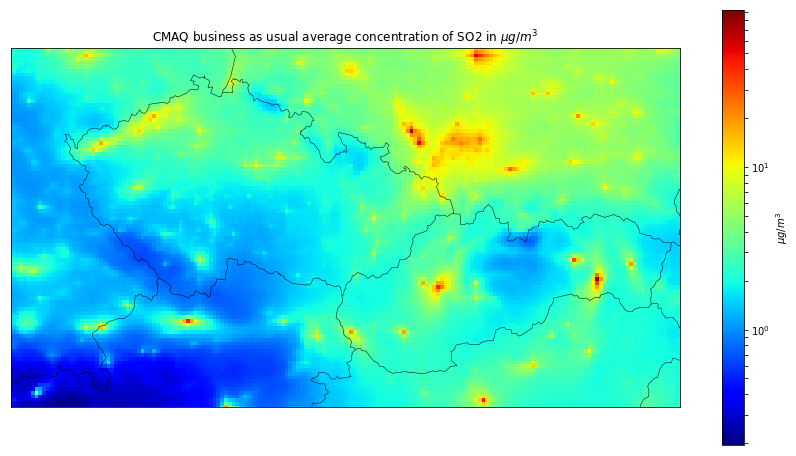

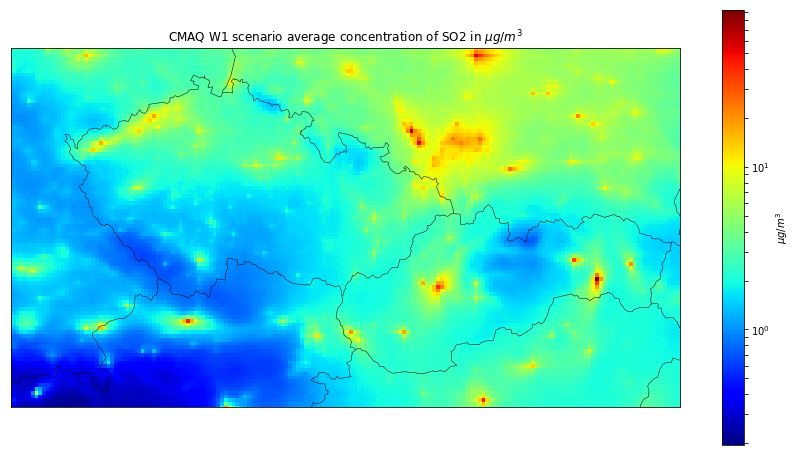

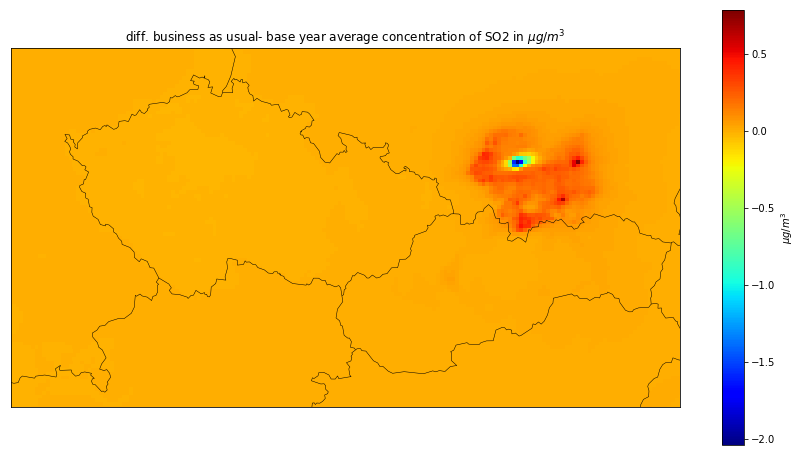

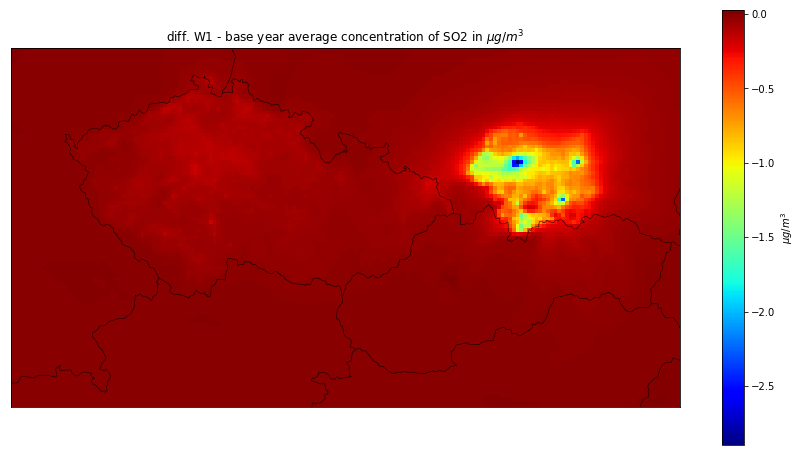

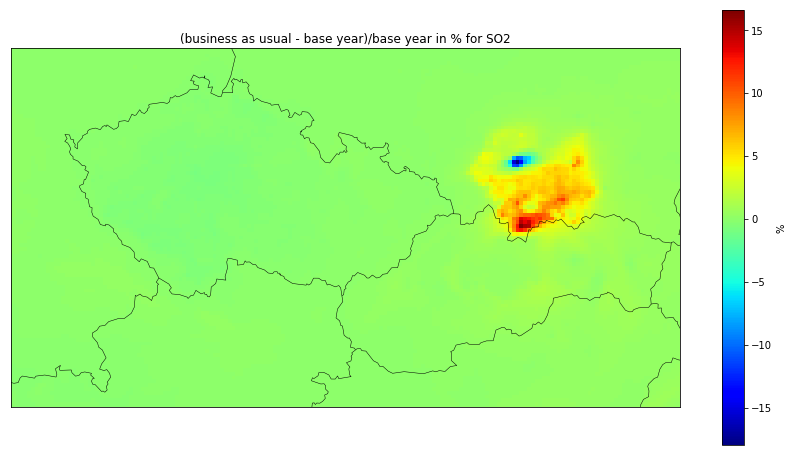

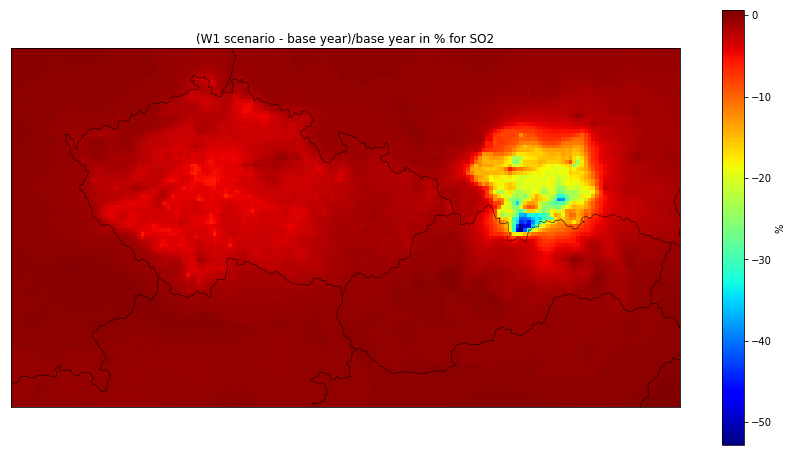

In [5]:
mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=49.375,lon_0=17.0,width=832900,height=446351,resolution='i')

#Plot base year conc, bussines as ussual conc, difference in absolute values and diff. in percentage
for i in dic_BASE.keys():
    
        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_BASE[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('CMAQ base year annual average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close()        
############################################################################        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_BAU[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('CMAQ business as usual average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close() 
############################################################################        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_W1[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('CMAQ W1 scenario average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close()    
############################################################################        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_BAU[i]-dic_BASE[i],cmap=plt.cm.jet,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('diff. business as usual- base year average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close()         
                
############################################################################        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,dic_W1[i]-dic_BASE[i],cmap=plt.cm.jet,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='$\mu g /m^3$')
        plt.title('diff. W1 - base year average concentration of {0} in $\mu g /m^3$'.format(i))
        plt.show()
        plt.close()         
#############################################################################        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,(dic_BAU[i]-dic_BASE[i])/dic_BASE[i]*100,cmap=plt.cm.jet,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='%')
        plt.title('(business as usual - base year)/base year in % for {0}'.format(i))
        plt.show()
        plt.close() 
#############################################################################        
        mapb.drawcountries()
        
        # choose one of the two style of the plot
        mapb.pcolormesh(lon,lat,(dic_W1[i]-dic_BASE[i])/dic_BASE[i]*100,cmap=plt.cm.jet,latlon=True) 
        #mapb.contourf(lon,lat,dic_ann[i],cmap=plt.cm.jet,latlon=True,norm=colors.LogNorm()) 

        plt.colorbar(label='%')
        plt.title('(W1 scenario - base year)/base year in % for {0}'.format(i))
        plt.show()
        plt.close() 
        
        